# 1. Initializations

## 1.1 General imports

In [1]:
### system
import sys
import os

### data management
import pandas as pd
import numpy as np

### graphical matplotlib basics
import matplotlib.pyplot as plt
# for jupyter notebook management
%matplotlib inline
%config Completer.use_jedi = False

### graphical seaborn basics
import seaborn as sns

### graphical plotly basics
# import plotly.graph_objects as go
# import plotly.express as px


## 1.2 General dataframe functions

In [2]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

print(f"Projet initialisé depuis : {PROJECT_ROOT}")
from smartcheck import dataframe_common as dfc

Projet initialisé depuis : c:\Users\remyc\PycharmProjects\avr25-mle-velib


## 1.3 General seaborn functions

In [3]:
# TODO

# 2. Loading and Data Quality

## 2.1 Loading of data sets and general exploration

### 2.1.1 NETFLIX

In [4]:
df_netflix = dfc.load_dataset_from_config('netflix_data', sep=',')

dfc.print_general_info(df_netflix)

CSV successfully loaded (small file).
--------------------
 This data set has 8807 rows and 12 columns 
********************
--------------------
 Quantitative variables description: 
********************
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000
--------------------
 Quantitative variables basic correlation: 
********************
              release_year
release_year           1.0
--------------------
 Information: 
********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country     

### 2.1.2 IMDB

In [5]:
df_imdb = dfc.load_dataset_from_config('imdb_data', sep=',')

dfc.print_general_info(df_imdb)

CSV successfully loaded (small file).
--------------------
 This data set has 6178 rows and 14 columns 
********************
--------------------
 Quantitative variables description: 
********************
              Date     Duration
count  6178.000000  5877.000000
mean   2005.952574    94.576995
std      15.910248    41.765795
min    1922.000000     2.000000
25%    1998.000000    70.000000
50%    2011.000000   100.000000
75%    2019.000000   116.000000
max    2023.000000   900.000000
--------------------
 Quantitative variables basic correlation: 
********************
              Date  Duration
Date      1.000000 -0.053237
Duration -0.053237  1.000000
--------------------
 Information: 
********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         6178 non-null   object 
 1   Date         6178 non-null   int64  
 2

## 2.2 Data quality refinement

### 2.2.1 NETFLIX

In [6]:
df_netflix_orig = df_netflix.copy()
df_netflix = df_netflix.drop_duplicates()

In [7]:
# df_netflix = df_netflix_orig.copy()

In [8]:
# Analysis of variable rating
dfc.display_variable_info(df_netflix.rating)
print("valeur la plus représentée :",df_netflix.rating.mode()[0])
df_netflix.rating = df_netflix.rating.fillna(df_netflix.rating.mode()[0])

Series analysis of [rating]:
--------------------
Unique sorted values for [rating] :
 ['66 min', '74 min', '84 min', 'G', 'NC-17', 'NR', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR', nan]
Value repartition for [rating] :
 rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64
--------------------
valeur la plus représentée : TV-MA


In [9]:
# Analysis of variable director
dfc.display_variable_info(df_netflix.director[:10])
print("valeur la plus représentée :",df_netflix.director.mode()[0])
# pas de changement avec la valeur la plus représentée pour ne pas altérer la répartition des données

Series analysis of [director]:
--------------------
Unique sorted values for [director] :
 ['Andy Devonshire', 'Haile Gerima', 'Julien Leclercq', 'Kirsten Johnson', 'Mike Flanagan', 'Robert Cullen, José Luis Ucha', 'Theodore Melfi', nan]
Value repartition for [director] :
 director
Kirsten Johnson                  1
Julien Leclercq                  1
Mike Flanagan                    1
Robert Cullen, José Luis Ucha    1
Haile Gerima                     1
Andy Devonshire                  1
Theodore Melfi                   1
Name: count, dtype: int64
--------------------
valeur la plus représentée : Rajiv Chilaka


### 2.2.1 IMDB

In [10]:
df_imdb['averageRating'] = pd.to_numeric(df_imdb.Rate, errors='coerce')
dfc.display_variable_info(df_imdb.averageRating.sort_values(ascending=False).head(10))

df_imdb['numVotes'] = pd.to_numeric(df_imdb.Votes.str.replace(',', ''), errors='coerce')
dfc.display_variable_info(df_imdb.numVotes.sort_values(ascending=False).head(10))

df_imdb = df_imdb.drop_duplicates()

Series analysis of [averageRating]:
--------------------
Unique sorted values for [averageRating] :
 [9.2, 9.3, 9.4, 9.5, 9.6, 9.7]
Value repartition for [averageRating] :
 averageRating
9.3    4
9.6    2
9.7    1
9.5    1
9.4    1
9.2    1
Name: count, dtype: int64
--------------------
Series analysis of [numVotes]:
--------------------
Unique sorted values for [numVotes] :
 [1715063.0, 1736338.0, 1767660.0, 1885776.0, 1912582.0, 1915230.0, 1948261.0, 2178860.0, 2428117.0, 2474122.0]
Value repartition for [numVotes] :
 numVotes
2474122.0    1
2428117.0    1
2178860.0    1
1948261.0    1
1915230.0    1
1912582.0    1
1885776.0    1
1767660.0    1
1736338.0    1
1715063.0    1
Name: count, dtype: int64
--------------------


## 2.3 Data combination and rework

In [11]:
all_content = pd.merge(df_netflix, df_imdb, left_on = ['title','release_year'], right_on = ['Name','Date'], how='inner')
display(all_content.head())
all_movies = all_content[all_content.type=='Movie'].copy()
all_movies['duration'] = all_movies.duration.apply(lambda dur: dur.replace(' min', '')).astype(int)
display(all_movies.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening,averageRating,numVotes
0,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,...,Film,PG,-,NaN,Mild,NaN,NaN,Mild,7.0,2247.0
1,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,...,Film,PG-13,-,Mild,NaN,Mild,Mild,NaN,6.3,6994.0
2,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,...,Film,NaN,-,No Rate,No Rate,No Rate,No Rate,No Rate,5.4,514.0
3,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,...,Series,TV-MA,4,No Rate,No Rate,No Rate,No Rate,No Rate,7.4,646.0
4,s19,Movie,Intrusion,Adam Salky,"Freida Pinto, Logan Marshall-Green, Robert Joh...",NaN,"September 22, 2021",2021,TV-14,94 min,...,Film,TV-14,-,NaN,Mild,Mild,Mild,Moderate,5.2,8561.0


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening,averageRating,numVotes
0,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91,...,Film,PG,-,NaN,Mild,NaN,NaN,Mild,7.0,2247.0
1,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104,...,Film,PG-13,-,Mild,NaN,Mild,Mild,NaN,6.3,6994.0
2,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127,...,Film,NaN,-,No Rate,No Rate,No Rate,No Rate,No Rate,5.4,514.0
4,s19,Movie,Intrusion,Adam Salky,"Freida Pinto, Logan Marshall-Green, Robert Joh...",NaN,"September 22, 2021",2021,TV-14,94,...,Film,TV-14,-,NaN,Mild,Mild,Mild,Moderate,5.2,8561.0
6,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103,...,Film,PG-13,-,Mild,Mild,Mild,Mild,NaN,6.0,237673.0


# 2. Data Viz' and Analysis

## 2.1 General Data Viz'

### 2.1.1 Seaborn

In [12]:
sns.set_theme(style = "ticks", context = "talk", palette = "bright")

## 2.1 Quantitative mono variable distribution

### 2.1.2 Seaborn

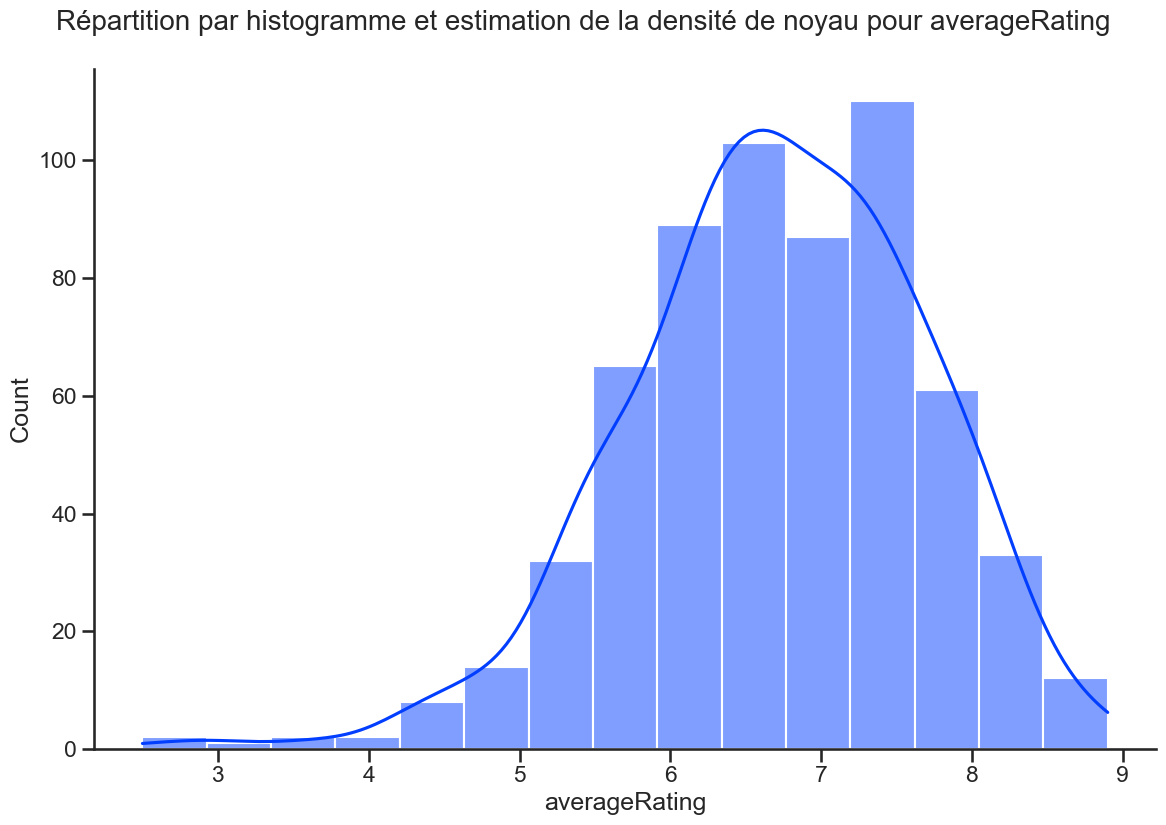

In [13]:
graph = sns.displot(
    data=all_movies,
    x=all_movies.averageRating.name,
    kind='hist',
    bins=15,
    kde=True,
    height=8,
    aspect=1.5
)
graph.fig.suptitle(
    'Répartition par histogramme et estimation de la densité de noyau pour averageRating',
    y=1.04,
    fontsize=20
)

plt.show()

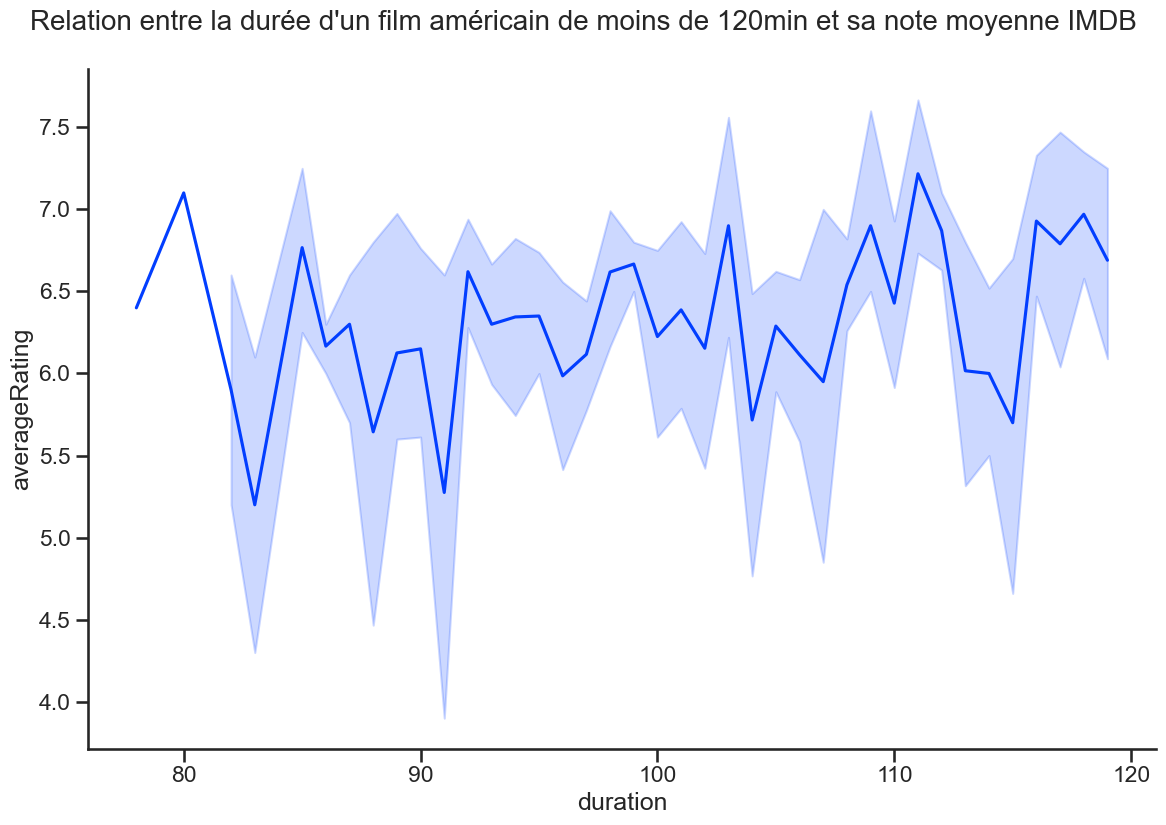

In [14]:
graph = sns.relplot(
    data=all_movies[(all_movies.country=='United States')&(all_movies.duration<120)],
    x=all_movies.duration.name,
    y=all_movies.averageRating.name,
    kind='line',
    height=8,
    aspect=1.5
)
graph.fig.suptitle(
    'Relation entre la durée d\'un film américain de moins de 120min et sa note moyenne IMDB',
    y=1.04,
    fontsize=20
)

plt.show()

## 2.2 Qualitative mono variable distribution

### 2.2.3 Seaborn

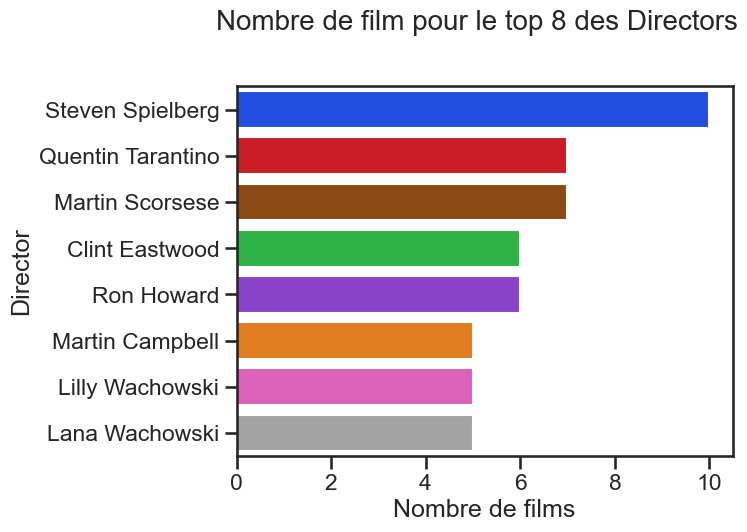

In [15]:
# data extraction
directors = all_content.director.str.split(', ', expand=True).stack().reset_index(drop=True)
top_directors_list = directors.value_counts().head(8)
top_directors = pd.DataFrame(directors)
top_directors.columns = ['Director']

graph = sns.countplot(
    data=top_directors[top_directors.Director.isin(top_directors_list.index)],
    y=top_directors.Director.name, # affichage horizontal
    order=top_directors_list.index,
    hue=top_directors[top_directors.Director.isin(top_directors_list.index)].Director,
    legend=False
)
graph.axes.set_xticks(np.arange(0, 11, 2))
graph.axes.set_xlabel('Nombre de films')
graph.figure.suptitle('Nombre de film pour le top 8 des Directors', y=1.04, fontsize=20)

plt.show()

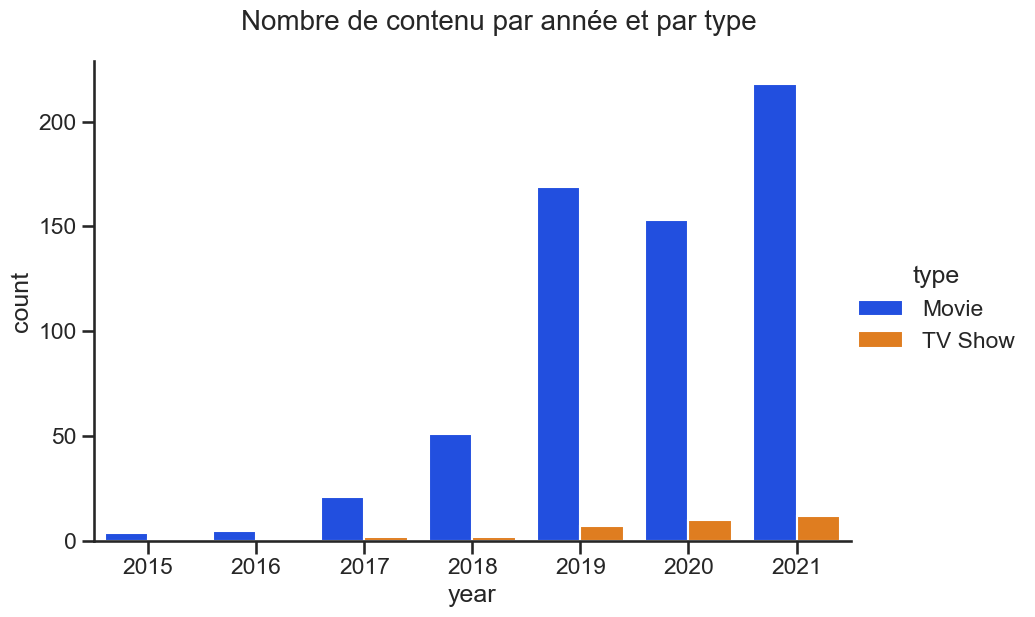

In [16]:
# data extraction
all_content["year"] = pd.to_datetime(all_content.date_added.str.strip()).dt.year

graph = sns.catplot(
    data=all_content,
    x=all_content.year.name,
    kind='count',
    hue=all_content.type.name,
    height=6,
    aspect=1.5
)
graph.figure.suptitle('Nombre de contenu par année et par type', y=1.04, fontsize=20)

plt.show()

## 2.3 Qualitative multi variable distribution

### 2.3.3 Seaborn

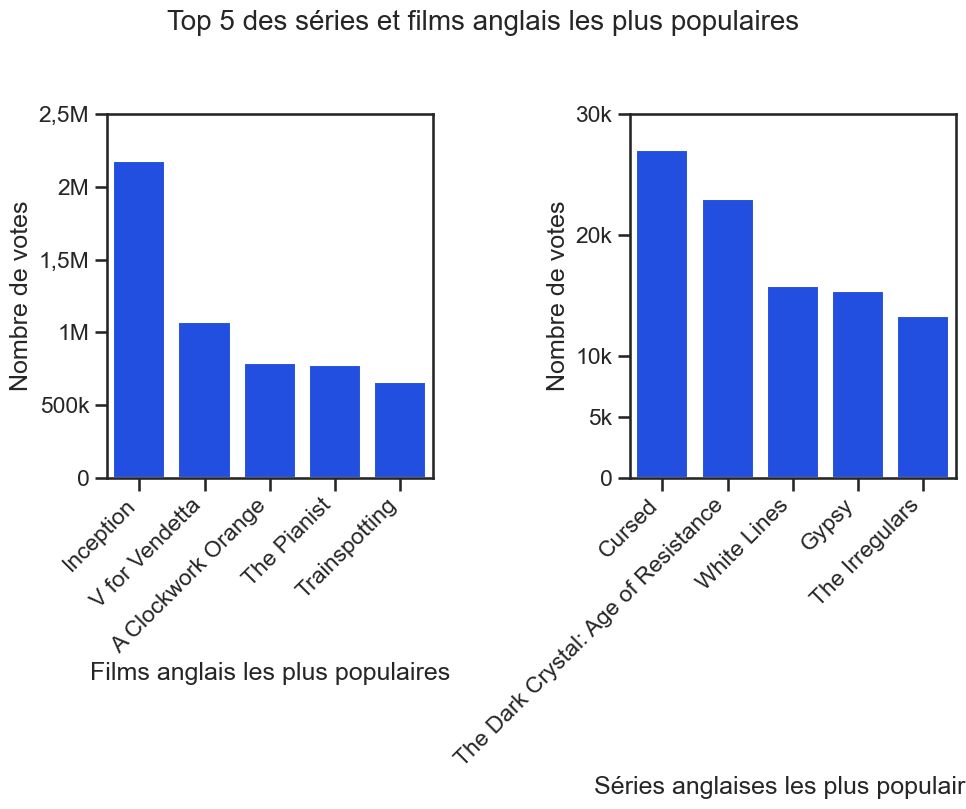

In [17]:
# data extraction
uk_movies = all_content.loc[(all_content.type=="Movie") & (all_content.country.str.contains('United Kingdom'))]
uk_series = all_content.loc[(all_content.type=="TV Show") & (all_content.country.str.contains('United Kingdom'))]

uk_movies = uk_movies.sort_values(by='numVotes', ascending=False)
uk_series = uk_series.sort_values(by='numVotes', ascending=False)

# Afficher côte à côte deux graphiques.
fig, axs = plt.subplots(figsize=(10, 8), nrows=1, ncols=2)
sns.barplot(
    data=uk_movies[:5]
    ,x=uk_movies.Name.name
    ,y=uk_movies.numVotes.name
    ,ax=axs[0]
)
sns.barplot(
    data=uk_series[:5]
    ,x=uk_series.Name.name
    ,y=uk_series.numVotes.name
    ,ax=axs[1]
)

# inclinaison des valeurs X et Y
axs[0].tick_params(axis='x', labelrotation=45)
for label in axs[0].get_xticklabels():
    label.set_ha('right')
axs[1].tick_params(axis='x', labelrotation=45)
for label in axs[1].get_xticklabels():
    label.set_ha('right')

# modification des valeurs affichées pour Y (votes)
axs[0].set_yticks(
    [0, 500000, 1000000, 1500000, 2000000, 2500000]
    ,['0', '500k', '1M', '1,5M', '2M', '2,5M']
)
axs[1].set_yticks(
    [0, 5000, 10000, 20000, 30000]
    ,['0', '5k', '10k', '20k', '30k']
)

# modification des labels X et Y
axs[0].set_xlabel("Films anglais les plus populaires")
axs[1].set_xlabel("Séries anglaises les plus populaires")
axs[0].set_ylabel("Nombre de votes")
axs[1].set_ylabel("Nombre de votes")

# ajout du titre
fig.suptitle('Top 5 des séries et films anglais les plus populaires', y=1.02, fontsize=20)

plt.tight_layout()
plt.show()

## 2.4 Quantitative multi variable correlation

### 2.4.2 Seaborn

RuntimeError: `lowess=True` requires statsmodels, an optional dependency, to be installed.

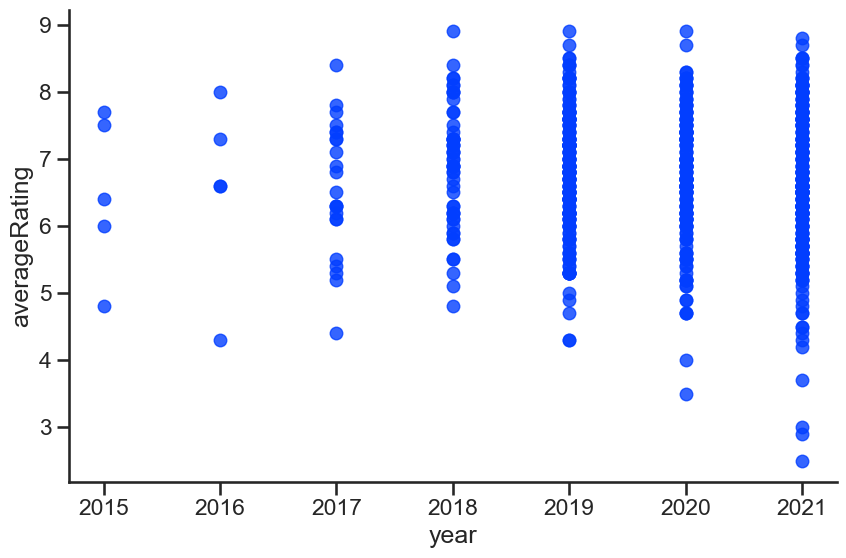

In [18]:
# data extraction
all_content["year"] = pd.to_datetime(all_content.date_added.str.strip()).dt.year

graph = sns.lmplot(
    data=all_content,
    x=all_content.year.name,
    y=all_content.averageRating.name,
    lowess=True,
    height=6,
    aspect=1.5
)
graph.figure.suptitle(
    'Evolution de la qualité du contenu du catalogue au fil du temps (régression linéaire par année)',
    y=1.04,
    fontsize=20)

plt.show()